<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4</b></center>    
<pre>    

## Simple Linear Regression

## Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

## Step 2. Import the dataset

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Step 3 . Check the State Column

In [4]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## Step 4 . Splitting dataset in to input and output

In [6]:
x = df.drop(['Profit'],axis=1)
y = df['Profit']
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [7]:
x = df.iloc[::,:4:]
y = df.iloc[::,4::]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


## Step 5 . Convert state Column into Numeric Column

## Step 5.1 .  Perform Transformation

In [8]:
x = pd.get_dummies(x,columns=['State'])
x

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False
5,131876.90,99814.71,362861.36,False,False,True
6,134615.46,147198.87,127716.82,True,False,False
7,130298.13,145530.06,323876.68,False,True,False
8,120542.52,148718.95,311613.29,False,False,True
9,123334.88,108679.17,304981.62,True,False,False


## Step 6 . Dummy variable trap

In [ ]:
# x = pd.get_dummies(x,columns=['State'])
# x

In [9]:
# Already Performed using | drop_first =True

## Step 7 Splitting dataset in to Train and Test

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [60]:
x_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
34,46426.07,157693.92,210797.67,True,False,False
37,44069.95,51283.14,197029.42,True,False,False
6,134615.46,147198.87,127716.82,True,False,False
40,28754.33,118546.05,172795.67,True,False,False
9,123334.88,108679.17,304981.62,True,False,False
31,61136.38,152701.92,88218.23,False,False,True
15,114523.61,122616.84,261776.23,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
43,15505.73,127382.30,35534.17,False,False,True
2,153441.51,101145.55,407934.54,False,True,False


In [61]:
x_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
18,91749.16,114175.79,294919.57,False,True,False
38,20229.59,65947.93,185265.10,False,False,True
47,0.00,135426.92,0.00,True,False,False
10,101913.08,110594.11,229160.95,False,True,False
24,77044.01,99281.34,140574.81,False,False,True
36,28663.76,127056.21,201126.82,False,True,False
44,22177.74,154806.14,28334.72,True,False,False
14,119943.24,156547.42,256512.92,False,True,False
30,61994.48,115641.28,91131.24,False,True,False
26,75328.87,144135.98,134050.07,False,True,False


In [62]:
y_train

,Profit
34,96712.80
37,89949.14
6,156122.51
40,78239.91
9,149759.96
31,97483.56
15,129917.04
1,191792.06
43,69758.98
2,191050.39


In [63]:
y_test

,Profit
18,124266.90
38,81229.06
47,42559.73
10,146121.95
24,108552.04
36,90708.19
44,65200.33
14,132602.65
30,99937.59
26,105733.54


## Step 8  Import LinearRegression model from linear_model family 

In [64]:
from sklearn.linear_model import LinearRegression

## Step 9  Fit the data

In [65]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Step 10  Predict the data

In [66]:
y_predict = model.predict(x_test)
print("---------- Y Test -----------")
print(y_predict)

---------- Y Test -----------
[[129293.24281324]
 [ 65631.19960805]
 [ 46772.76890361]
 [136654.7883768 ]
 [112594.21499196]
 [ 74746.55228928]
 [ 65926.23991316]
 [152376.90749736]
 [100747.13901427]
 [112760.26131929]]


## Step 11  Display Result

In [67]:
# y_test and y_predict

In [68]:
import matplotlib.pyplot as plt

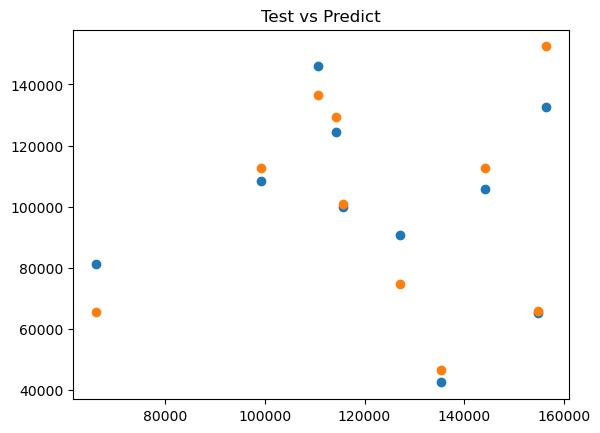

In [69]:
plt.scatter(x_test['Administration'],y_test)
plt.scatter(x_test['Administration'],y_predict)
plt.title('Test vs Predict')
plt.show()

## RSS

In [74]:
rss = np.sum((y_test.values - y_predict) ** 2)

In [75]:
rss

np.float64(1088625660.8394265)

## R Square

In [ ]:
r_sq = 1 - (rss/)